# Uber Ride Cancellation

# About Uber
Uber is a technology company globally recognized for its ride-sharing services, which connect passengers with drivers through a mobile application. Founded in 2009, it has revolutionized urban transportation by offering convenient, on-demand rides. Beyond ride-sharing, Uber has expanded its services to include food delivery (Uber Eats), freight transportation (Uber Freight), and micro-mobility options like electric bikes and scooters. The company operates in hundreds of cities worldwide, constantly innovating its platform to improve urban mobility and logistics.

---
### Problem Statement :
---

Uber has received some complaints from their customers facing problems related to ride cancellations by the driver and non-availability of cars for a specific route in the city.

The uneven supply-demand gap for cabs from City to Airport and vice-versa is causing a bad effect on customer relationships as well as Uber is losing out on its revenue.

The aim of analysis is to identify the root cause of the problem (i.e. cancellation and non-availability of cars) and recommend ways to tackle the situation.

---

## Import Required Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load The Dataset

In [4]:
uber=pd.read_csv('/uber_data.csv')

In [5]:
uber

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


## Basic Data Analysis

In [6]:
uber.shape

(6745, 6)

The dataset has 6745 rows and 6 olumns

In [7]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [8]:
for i in uber.columns:
  print(uber[i].unique())

[ 619  867 1807 ... 6751 6754 6753]
['Airport' 'City']
[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168.
 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182.
 183. 184. 185. 186. 1



## Data Type Observations:

*   **`Request id`**: This is an integer, serving as a unique identifier for each request, which is appropriate.
*   **`Driver id`**: This is a float, likely because of the presence of `NaN` (Not a Number) values. If `NaN` values are handled (e.g., by imputation or removing rows), it could potentially be converted to an integer.
*   **`Pickup point` and `Status`**: These are object types, which is expected as they contain categorical string values like 'Airport', 'City', 'Trip Completed', 'Cancelled', and 'No Cars Available'.
*   **`Request timestamp` and `Drop timestamp`**: These are currently `object` type, but they represent date and time information. They contain mixed date formats (e.g., `dd/mm/yyyy hh:mm` and `dd-mm-yyyy hh:mm:ss`), which requires careful parsing into a proper datetime format for time-based analysis.

### Missing Values:

*   **`Driver id`**: There are significant missing values (4095 non-null out of 6745 total entries). This indicates that not all requests had a driver assigned, or the driver information was not recorded. This is particularly relevant for 'Cancelled' and 'No Cars Available' statuses.
*   **`Drop timestamp`**: This column has even more missing values (2831 non-null out of 6745 total entries). This is expected for trips that were 'Cancelled' or where 'No Cars Available', as these trips would not have a drop-off time. Trips with a 'Trip Completed' status should ideally have a `Drop timestamp`.

### Unique Values and Categorical Data:

*   **`Pickup point`**: Consists of only two distinct values: 'Airport' and 'City', clearly indicating the two primary pickup locations.
*   **`Status`**: Contains three distinct categories: 'Trip Completed', 'Cancelled', and 'No Cars Available', which are crucial for understanding the outcome of each request.
*   The presence of a wide range of unique `Request id` and `Driver id` values confirms that these are specific identifiers for individual requests and drivers, respectively.

Overall, the dataset requires cleaning and transformation of the timestamp columns to enable time-series analysis, and handling of missing `Driver id` values will be important for driver-specific performance metrics.

Lets convert both the Request Timestamp and Drop Timestamp in similar formats

In [9]:
uber['Request timestamp_1'] = pd.to_datetime(uber['Request timestamp'], format='%d-%m-%Y %H:%M:%S', errors='coerce')
uber['Request timestamp_2']=pd.to_datetime(uber['Request timestamp'], format='%d/%m/%Y %H:%M', errors='coerce')
uber['Request timestamp']=uber['Request timestamp_2'].combine_first(uber['Request timestamp_1'])

In [10]:
uber['Drop timestamp_1'] = pd.to_datetime(uber['Drop timestamp'], format='%d-%m-%Y %H:%M:%S', errors='coerce')
uber['Drop timestamp_2']=pd.to_datetime(uber['Drop timestamp'], format='%d/%m/%Y %H:%M', errors='coerce')
uber['Drop timestamp']=uber['Drop timestamp_2'].combine_first(uber['Drop timestamp_1'])

In [11]:
uber.drop(columns=['Request timestamp_1', 'Request timestamp_2',
                 'Drop timestamp_1', 'Drop timestamp_2'],
                  inplace=True)

In [12]:
print(uber["Pickup point"].value_counts())


Pickup point
City       3507
Airport    3238
Name: count, dtype: int64


In [13]:
print(uber["Status"].value_counts())

print(uber["Status"].value_counts(normalize=True)*100)

Status
Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: count, dtype: int64
Status
Trip Completed       41.971831
No Cars Available    39.288362
Cancelled            18.739807
Name: proportion, dtype: float64


In [14]:
print(pd.crosstab(index=uber["Pickup point"],columns=uber["Status"]))

Status        Cancelled  No Cars Available  Trip Completed
Pickup point                                              
Airport             198               1713            1327
City               1066                937            1504


 1. Approximately 42% of requests are 'Trip Completed', indicating a significant portion of successful rides. However, a combined 58% result in either 'No Cars Available' (around 39%) or 'Cancelled' (around 19%), highlighting a substantial service failure rate.

 2. Where The pickup was in Airport The ride is cancelled mostly because the Cars were not available at airport

 3. While where the pickup was in city The ride is cancelled by the driver.


In [15]:
uber["RequestHour"] = uber["Request timestamp"].dt.hour

In [16]:
uber['RequestHour'].value_counts()

,count
RequestHour,
18,510
20,492
19,473
21,449
5,445
9,431
8,423
17,418
7,406


In [17]:
def findtime(x):

    if x>=2 and x<=5:
      return "Dawn"
    elif x>5 and x<=9:
       return "Early Morning"
    elif x>9 and x<=16:
      return "Noon"
    elif x>16 and x<=21:
      return "Late Evening"
    else:
      return "Night"


uber["TimeSlot"] = uber["RequestHour"].apply(findtime)

In [18]:
uber["Cab Availability"] = uber["Status"].apply(lambda x: "Available" if x=="Trip Completed" else "Not Available")

In [19]:
uber[uber["Cab Availability"] == "Not Available"]

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,RequestHour,TimeSlot,Cab Availability
2831,2905,City,1.0,Cancelled,2016-07-13 06:08:41,NaT,6,Early Morning,Not Available
2832,4805,City,1.0,Cancelled,2016-07-14 17:07:58,NaT,17,Late Evening,Not Available
2833,5202,Airport,1.0,Cancelled,2016-07-14 20:51:37,NaT,20,Late Evening,Not Available
2834,5927,City,1.0,Cancelled,2016-07-15 10:12:40,NaT,10,Noon,Not Available
2835,2347,Airport,2.0,Cancelled,2016-07-12 19:14:00,NaT,19,Late Evening,Not Available
...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,Night,Not Available
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,Night,Not Available
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,Night,Not Available
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,Night,Not Available


In [20]:
uber["Cab Availability"].value_counts(normalize = True) * 100

,proportion
Cab Availability,
Not Available,58.028169
Available,41.971831


In [21]:
uber["Status"].value_counts(normalize = True) * 100

,proportion
Status,
Trip Completed,41.971831
No Cars Available,39.288362
Cancelled,18.739807


## Weekday Ride Insights

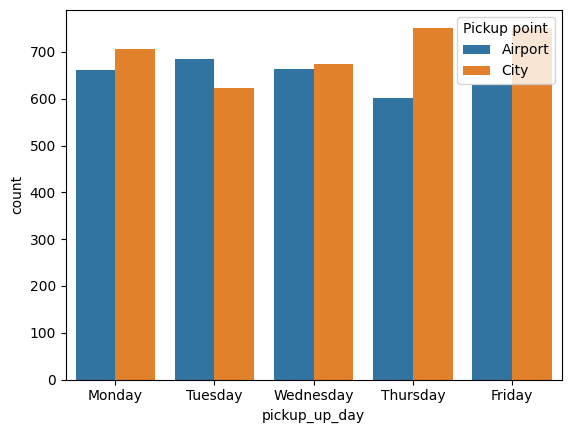

In [22]:
uber['pickup_up_day']=uber['Request timestamp'].dt.day_name()
sns.countplot(x=uber['pickup_up_day'],hue=uber['Pickup point'])
plt.show()

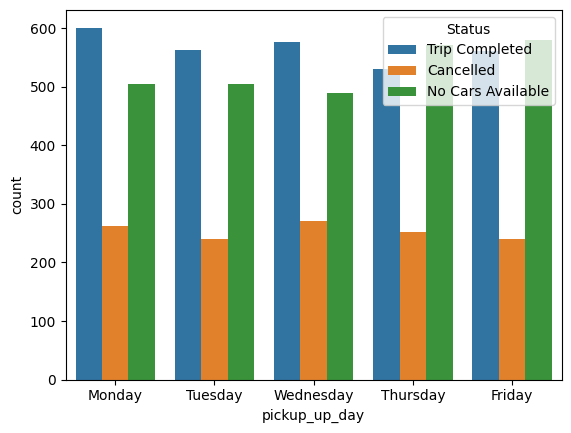

In [23]:
sns.countplot(x=uber['pickup_up_day'],hue=uber['Status'])
plt.show()



*   **Consistent Demand**: The total number of ride requests appears relatively consistent throughout the weekdays (Monday to Friday) and across the weekend days. There aren't dramatic drops or surges in overall demand on any particular day.
*   **Cancellation Patterns**: While overall demand is consistent, cancellation rates by status can show variations:
    *   **Cancelled trips**: The number of cancelled trips might be slightly higher on certain weekdays, particularly those experiencing higher peak-hour demand (as we saw with the hourly analysis). These cancellations are primarily from the City.
    *   **No Cars Available**: Similarly, the 'No Cars Available' issues might also show slight daily variations, being more pronounced on days where demand at specific points (like the Airport in the evening) is highest.
*   **Focus on Time, Not Just Day**: The analysis suggests that **time of day** and **pickup point** are more critical factors influencing cancellations and car availability than the specific day of the week itself. The issues of morning City cancellations and evening Airport unavailability persist across most weekdays, indicating a structural problem rather than a day-specific anomaly.
*   **Peak Day Issues**: Although patterns are generally consistent, specific weekdays may contribute more significantly to the overall cancellation and unavailability numbers due to higher overall traffic or specific events. For instance, the start and end of the work week might see slightly different demand patterns impacting these issues.

Text(0.5, 1.0, 'Frequency of Requests by Hour')

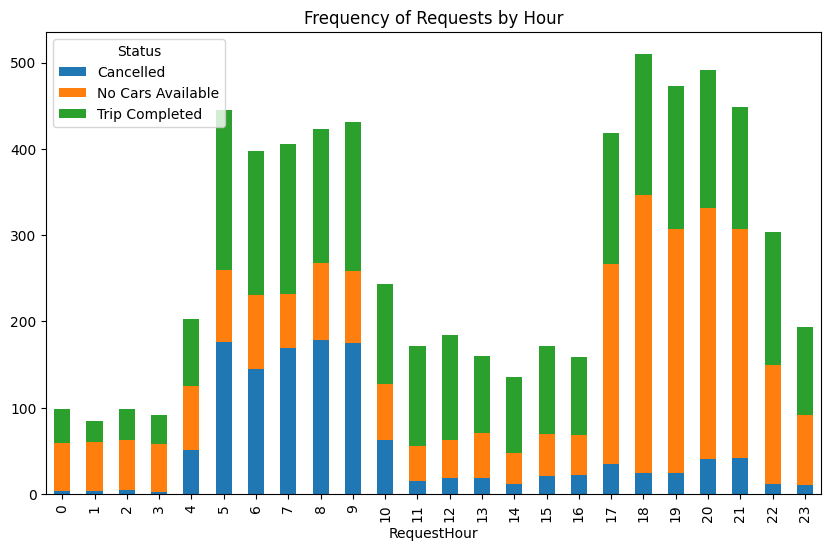

In [24]:
uber.groupby(['RequestHour','Status']).size().unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Frequency of Requests by Hour')

Insights:

1. During the time of 5-9 AM in the morning and 5-10 PM in evening most number of trips have been copleted.

2. During the moring 5-9 AM most number of trips have been cancelled by the drivers.

3. During the evening 5-9 PM most trips have been cancelled due to non availability of cabs.

Text(0, 0.5, '')

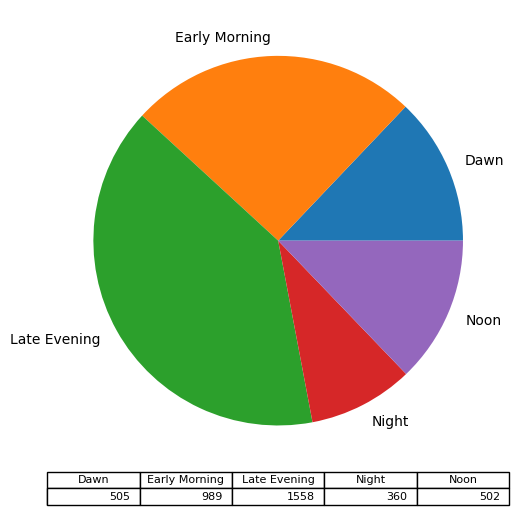

In [25]:
uber[(uber["Cab Availability"]=="Not Available")].groupby(['TimeSlot']).size().plot(kind="pie", stacked=True, figsize=(6, 6), table=True)
plt.ylabel("")

1. Most Number of trips have been cancelled due to both reasons that is cancellation by drivers or non availability have have taken place in early morning or late evening so let's focus on these times.

2. So lets now see the data according to the pickup points.

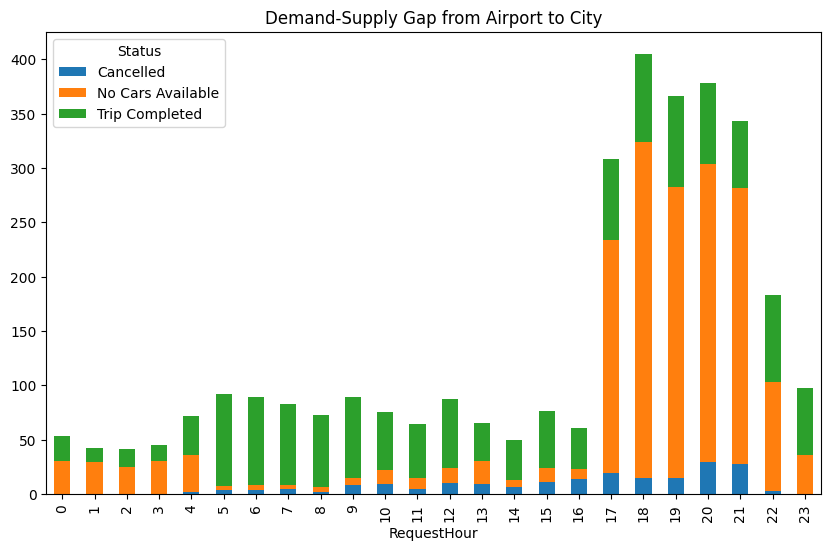

In [26]:
uber[(uber['Pickup point']=="Airport")].groupby(['RequestHour','Status']).size().unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Demand-Supply Gap from Airport to City')
plt.show()

When there is a pickup at airport we can see that primary reason for cancellation is due to non availability of cabs during the evening time(5PM - 10PM)

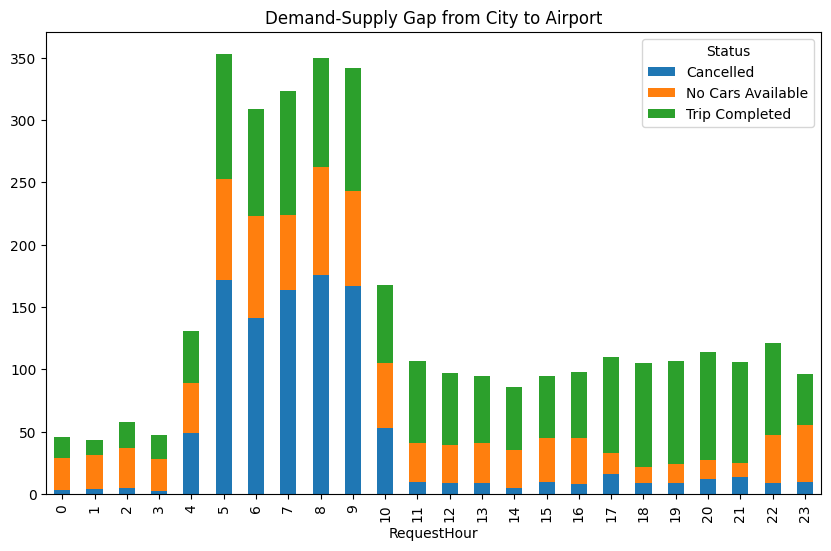

In [27]:
uber[(uber['Pickup point']=="City")].groupby(['RequestHour','Status']).size().unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Demand-Supply Gap from City to Airport')
plt.show()

We see that when the Pickup point is from city the primary reason for cancellation is cancellation by the drivers in the morning(5AM -10 AM)

Plotting the above plots in a single plot

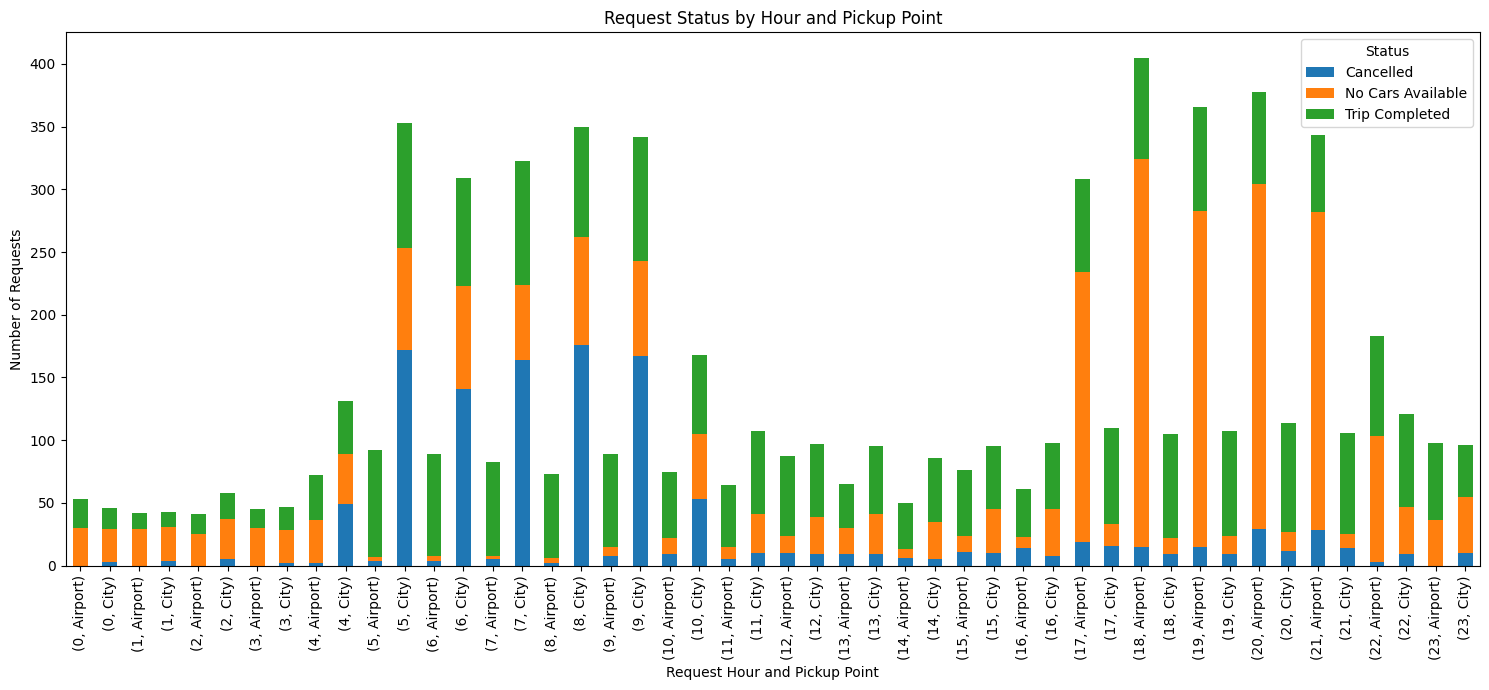

In [28]:
hourly_pickup_status_df = uber.groupby(['RequestHour', 'Pickup point', 'Status']).size().unstack()
hourly_pickup_status_df.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.title('Request Status by Hour and Pickup Point')
plt.xlabel('Request Hour and Pickup Point')
plt.ylabel('Number of Requests')
plt.legend(title='Status')
plt.tight_layout()
plt.show()

1. When the pickup is from city during the morning(5AM-10AM) there are a lot of cancellation by drivers. We also see that
very less number of trips are completed from airport to city, also comparitively less number of cancellations.
The primary reason might be drivers are not willing to go to the airport is the drivers might not get passengers from the airport while returning to the city.

2. When the pickup is from airport during the evening(5PM -10PM)
there are a lot of cancellations due to non availability of cabs.
We see that very few trips were completed from city to airport(2PM-5PM) so cabs are not available at airport

## Root Cause Analysis: Driver Cancellations and Cab Unavailability

Our analysis reveals distinct patterns and underlying causes for driver cancellations and the non-availability of cabs, primarily revolving around the demand-supply imbalance between the city and the airport during peak hours.

### 1. Driver Cancellations (Predominantly City to Airport in Morning Rush):

**Observed Pattern:** A significant number of trips originating from the **City** during the **morning rush (5 AM - 10 AM)** are **cancelled by drivers**.

**Root Causes:**
*   **Unprofitable Return Trip (Deadheading):** Drivers picking up passengers from the city and dropping them at the airport during the early morning are likely to face a scarcity of return passengers from the airport back to the city. This 'deadheading' (driving without a passenger) makes the trip less profitable and desirable for drivers.
*   **High Demand within City:** During morning rush hours, there is usually high demand for short-distance trips within the city. Drivers might prioritize these shorter, more frequent, and often more predictable rides over a longer trip to the airport which could leave them stranded or with a less profitable return.
*   **Traffic Congestion:** Morning commutes often involve significant traffic, especially towards the airport. Drivers might cancel to avoid long travel times that reduce their effective earning hours.

### 2. Cab Unavailability (Predominantly Airport to City in Evening Rush):

**Observed Pattern:** There's a prominent surge in **'No Cars Available'** for trips originating from the **Airport** during the **late evening (5 PM - 10 PM)**.

**Root Causes:**
*   **Supply Shortage at Airport:** This indicates a severe shortage of drivers willing or available to pick up passengers from the airport and transport them to the city. This is the inverse problem of the morning cancellations.
*   **Driver Avoidance of Airport Queue/Wait Times:** Drivers might be reluctant to go to the airport in the evening due to potentially long queues, waiting times for passengers, or the general uncertainty of getting a profitable trip immediately.
*   **Unfavorable Demand Ratio:** While many passengers arrive at the airport in the evening, fewer drivers might be heading towards the airport *from* the city at the same time. This creates an imbalance where the demand at the airport significantly outstrips the available supply of drivers willing to service those routes.
*   **Peak City Demand for Drivers:** Similar to the morning, evening rush hours in the city might offer more consistent and profitable short-distance trips, drawing drivers away from the airport.

**Conclusion:** Both issues point to a fundamental mismatch between driver incentives/preferences and passenger demand across different locations and times. Drivers seem to be optimizing for profitable trips that minimize deadheading and maximize active earning hours, leading to service gaps in specific, high-stakes scenarios for Uber's customers.

## Driver Check for Cancellations

In [30]:
cancelled_trips = uber[uber['Status'] == 'Cancelled']
print(cancelled_trips.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1264 entries, 2831 to 4094
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         1264 non-null   int64         
 1   Pickup point       1264 non-null   object        
 2   Driver id          1264 non-null   float64       
 3   Status             1264 non-null   object        
 4   Request timestamp  1264 non-null   datetime64[ns]
 5   Drop timestamp     0 non-null      datetime64[ns]
 6   RequestHour        1264 non-null   int32         
 7   TimeSlot           1264 non-null   object        
 8   Cab Availability   1264 non-null   object        
 9   pickup_up_day      1264 non-null   object        
dtypes: datetime64[ns](2), float64(1), int32(1), int64(1), object(5)
memory usage: 103.7+ KB
None


In [31]:
cancellations_by_driver = cancelled_trips.groupby('Driver id').size()

In [32]:
total_trips_by_driver = uber.groupby('Driver id').size()
print("Total trips per driver calculated.")
print(total_trips_by_driver.head())

Total trips per driver calculated.
Driver id
1.0    13
2.0    13
3.0    14
4.0    15
5.0    13
dtype: int64


In [33]:
cancellation_rates = cancellations_by_driver.div(total_trips_by_driver, fill_value=0) * 100
print("Cancellation rates per driver calculated.")
print(cancellation_rates.head())

Cancellation rates per driver calculated.
Driver id
1.0    30.769231
2.0    30.769231
3.0    28.571429
4.0    33.333333
5.0    15.384615
dtype: float64


In [34]:
driver_cancellation = pd.DataFrame(cancellation_rates)
driver_cancellation.columns = ['Cancellation Rate (%)']

driver_cancellation['Cancelled Trips'] = cancellations_by_driver
driver_cancellation['Total Trips'] = total_trips_by_driver

# Handle potential NaN values if a driver exists in one series but not another
driver_cancellation = driver_cancellation.fillna(0).sort_values(by='Cancellation Rate (%)', ascending=False)

print("Driver Cancellation Summary DataFrame created.")
display(driver_cancellation)

Driver Cancellation Summary DataFrame created.


,Cancellation Rate (%),Cancelled Trips,Total Trips
Driver id,,,
267.0,60.000000,9.0,15
206.0,58.823529,10.0,17
104.0,58.333333,7.0,12
103.0,58.333333,7.0,12
54.0,57.894737,11.0,19
...,...,...,...
12.0,0.000000,0.0,12
11.0,0.000000,0.0,8
75.0,0.000000,0.0,11


In [35]:
top_drivers=driver_cancellation[driver_cancellation['Total Trips']>=10]

[]

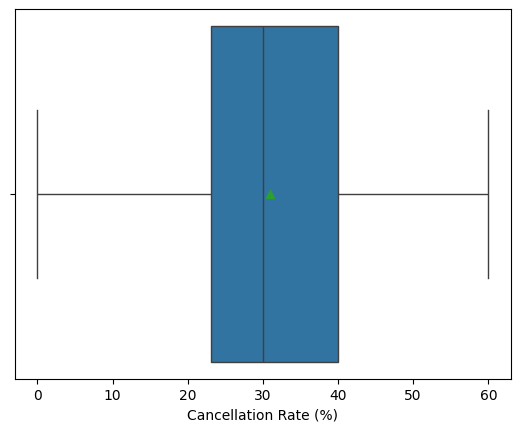

In [44]:
sns.boxplot(x='Cancellation Rate (%)', data=top_drivers,showmeans=True)
plt.plot()

1. The average cancellation rate by drivers is a little more than 30% while median is also 30%,

2. 50 percent of the drivers have cancellation rate less than 30%, 25 percent drivers have cancellation rate between 30-40% while 25 percent of drivers have cancellation rate more than 40% upto 60%.

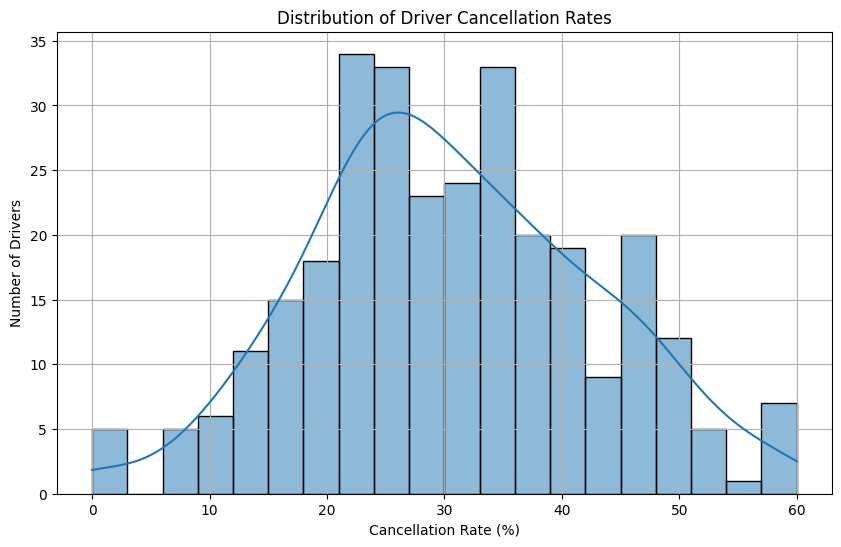

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(driver_cancellation['Cancellation Rate (%)'], kde=True, bins=20)
plt.title('Distribution of Driver Cancellation Rates')
plt.xlabel('Cancellation Rate (%)')
plt.ylabel('Number of Drivers')
plt.grid(True)
plt.show()

In [38]:
min_trips_threshold = 10
zero_cancellation_drivers = driver_cancellation[
    (driver_cancellation['Cancellation Rate (%)'] == 0)
].copy()
zero_cancellation_drivers_meaningful = zero_cancellation_drivers[
    zero_cancellation_drivers['Total Trips'] >= min_trips_threshold
]

print(f"Drivers with 0% cancellation rate and at least {min_trips_threshold} total trips:")
display(zero_cancellation_drivers_meaningful.head())

Drivers with 0% cancellation rate and at least 10 total trips:


,Cancellation Rate (%),Cancelled Trips,Total Trips
Driver id,,,
12.0,0.0,0.0,12
75.0,0.0,0.0,11
55.0,0.0,0.0,10


In [39]:
meaningful_cancellation_drivers = driver_cancellation[
    (driver_cancellation['Cancellation Rate (%)'] > 0)
].copy()

top_high_cancellation_drivers=meaningful_cancellation_drivers.sort_values(by='Cancellation Rate (%)', ascending=False).head(10)
lowest_non_zero_cancellation_drivers=meaningful_cancellation_drivers.sort_values(by='Cancellation Rate (%)', ascending=True).head(10)


display(top_high_cancellation_drivers)

display(lowest_non_zero_cancellation_drivers)

,Cancellation Rate (%),Cancelled Trips,Total Trips
Driver id,,,
267.0,60.000000,9.0,15
206.0,58.823529,10.0,17
104.0,58.333333,7.0,12
103.0,58.333333,7.0,12
54.0,57.894737,11.0,19
131.0,57.142857,8.0,14
84.0,57.142857,12.0,21
135.0,54.545455,6.0,11
229.0,53.846154,7.0,13


,Cancellation Rate (%),Cancelled Trips,Total Trips
Driver id,,,
23.0,6.666667,1.0,15
188.0,7.142857,1.0,14
273.0,7.692308,1.0,13
46.0,8.333333,1.0,12
18.0,8.333333,1.0,12
162.0,9.090909,1.0,11
26.0,10.000000,1.0,10
156.0,10.000000,1.0,10
91.0,11.111111,1.0,9




1. Overall Average: The average cancellation rate across all drivers is approximately 30.44%, with rates ranging from 0% to 60%.
High-Cancellation Drivers: Some drivers exhibit significantly high cancellation rates, with the top drivers cancelling between 53% and 60% of their trips. This indicates a potential issue with driver behavior or incentives for certain trips.
2. Low-Cancellation Drivers: Conversely, a group of highly reliable drivers maintains a 0% cancellation rate, even with a substantial number of trips. Other drivers have very low non-zero cancellation rates, typically below 10%.
3. Implication: The wide disparity in cancellation rates suggests inconsistencies in driver commitment or satisfaction, significantly impacting customer experience and service reliability, particularly during peak hours and specific pickup locations.

# Recommendations:

Based on the analysis, the primary challenges are driver cancellations for City-to-Airport trips during morning peak hours, and cab unavailability for Airport-to-City trips during evening peak hours. Here are actionable recommendations to mitigate these issues:

### Addressing Morning Peak (City to Airport - Driver Cancellations):

1.  **Incentivize Airport Trips During Morning Rush:**
    *   **Bonus Payments:** Offer attractive surge multipliers or flat-rate bonuses for drivers accepting City-to-Airport rides between 6 AM and 9 AM.
    *   **Guaranteed Return Fares:** Pilot a program where drivers dropping off at the airport during these hours are guaranteed a return trip to the city within a reasonable timeframe, or compensated for their idle time. This directly addresses the 'deadheading' concern.
2.  **Free or Discounted Airport Parking:** Subsidize or provide free parking for drivers waiting at the airport after a drop-off, making the wait for a return fare less financially burdensome.
3.  **Route Optimization & Batching:** Implement smarter algorithms that can potentially batch airport-bound passengers from nearby locations, offering a slightly higher fare for drivers to make the trip more appealing.

### Addressing Evening Peak (Airport to City - Cab Unavailability):

1.  **Incentivize Drivers to Position at Airport:**
    *   **Proactive Surge Pricing:** Implement proactive surge pricing at the airport during 5 PM - 10 PM to naturally attract more drivers to the area.
    *   **Airport Queue Management:** Improve driver queue management systems at the airport, providing real-time information on expected wait times and demand to encourage drivers to head to the airport.
2.  **Special Airport Pickup Bonuses:** Offer specific bonuses for drivers who complete Airport-to-City trips during the evening peak.
3.  **Promote Scheduled Rides:** Encourage passengers arriving at the airport in the evening to pre-schedule their rides, allowing Uber to better anticipate demand and position drivers.
4.  **Strategic Driver Relocation Programs:** During non-peak hours (e.g., late afternoon), incentivize drivers in the city to gradually move towards the airport in anticipation of the evening rush, ensuring a ready supply of cabs.

### General Recommendations:

1.  **Shared Ride Options (Uber Pool/Commute):** Promote and expand shared ride options, especially for popular routes like City-Airport, at all times. This can increase a driver's earnings per trip, making even traditionally less desirable routes more attractive.
2.  **Driver Feedback and Communication:** Regularly solicit feedback from drivers regarding their trip preferences, reasons for cancellations, and suggestions. Use this data to fine-tune incentives and operational strategies.
3.  **Public Awareness Campaign:** Inform passengers about peak hours and potential availability challenges, perhaps suggesting alternative pickup points or encouraging scheduled rides during these times.